In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [364]:
df = pd.read_csv('CKDU_Confimed.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'



In [365]:
df.head()

,Confirmed Cases
Date,
2010-01-01,584
2010-02-01,606
2010-03-01,294
2010-04-01,224
2010-05-01,296


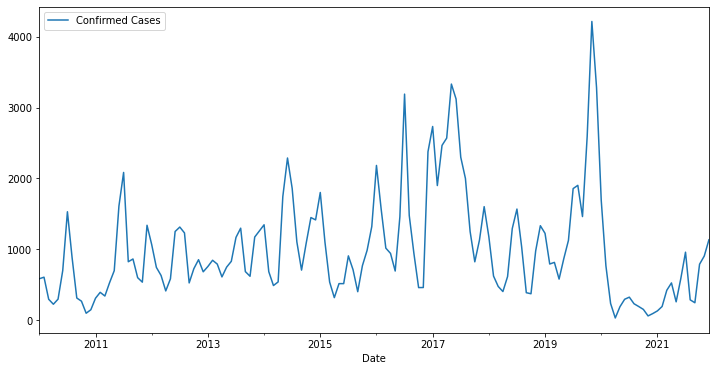

In [366]:
df.plot(figsize=(12,6))

In [367]:
len(df)

144

In [368]:
train = df.iloc[:108]
test = df.iloc[108:]

In [369]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [370]:
df.head(),df.tail()

(            Confirmed Cases
 Date                       
 2010-01-01              584
 2010-02-01              606
 2010-03-01              294
 2010-04-01              224
 2010-05-01              296,             Confirmed Cases
 Date                       
 2021-08-01              286
 2021-09-01              245
 2021-10-01              789
 2021-11-01              904
 2021-12-01             1134)

In [371]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [372]:
scaled_train[:10]

array([[0.15049444],
       [0.15729295],
       [0.06087763],
       [0.03924598],
       [0.06149567],
       [0.18634116],
       [0.44283066],
       [0.24227441],
       [0.06644005],
       [0.05253399]])

In [373]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [374]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [375]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.15049444 0.15729295 0.06087763]
Predict this y: 
 [[0.03924598]]


In [376]:
X.shape

(1, 3, 1)

In [377]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [378]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [379]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [380]:
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100)               40800     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [407]:
# fit model
model.fit(generator,epochs=170)

Epoch 1/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0041
Epoch 2/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0044
Epoch 3/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0042
Epoch 4/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 5/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 6/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 7/170
96/96 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 8/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 9/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 10/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 11/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 12/170
96/96 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 13/170
96/96 [=================

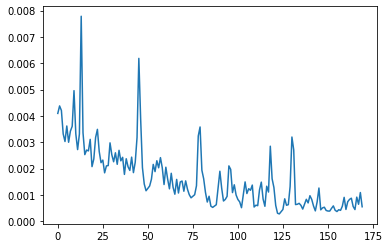

In [408]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [409]:
last_train_batch = scaled_train[-12:]

In [410]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [411]:
model.predict(last_train_batch)

array([[0.34288973]], dtype=float32)

In [412]:
scaled_test[0]

array([0.34857849])

In [413]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [414]:
test_predictions

[array([0.34288973], dtype=float32),
 array([0.1601786], dtype=float32),
 array([0.14979671], dtype=float32),
 array([0.19545968], dtype=float32),
 array([0.3908733], dtype=float32),
 array([0.442249], dtype=float32),
 array([0.31588107], dtype=float32),
 array([0.1556327], dtype=float32),
 array([0.1120825], dtype=float32),
 array([0.2068867], dtype=float32),
 array([0.37316048], dtype=float32),
 array([0.4022632], dtype=float32),
 array([0.2293643], dtype=float32),
 array([0.09738487], dtype=float32),
 array([0.07910912], dtype=float32),
 array([0.18529199], dtype=float32),
 array([0.27065045], dtype=float32),
 array([0.3181684], dtype=float32),
 array([0.17814131], dtype=float32),
 array([0.10879013], dtype=float32),
 array([0.16981593], dtype=float32),
 array([0.27265683], dtype=float32),
 array([0.3625303], dtype=float32),
 array([0.44679463], dtype=float32),
 array([0.20233598], dtype=float32),
 array([0.14837202], dtype=float32),
 array([0.1548902], dtype=float32),
 array([0.313

In [415]:
test.head()

,Confirmed Cases,Predictions
Date,,
2019-01-01,1225,1535.828167
2019-02-01,792,916.823014
2019-03-01,815,644.159143
2019-04-01,579,572.727875
2019-05-01,866,829.891136


In [416]:
true_predictions = scaler.inverse_transform(test_predictions)

In [417]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


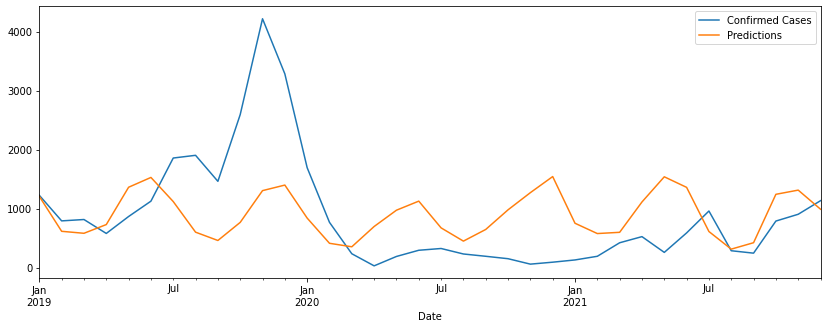

In [418]:
test.plot(figsize=(14,5))

In [419]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Confirmed Cases'],test['Predictions']))
print(rmse)

914.0801409061261
